# ***Data train.csv***

## **Import Libraries**

In [ ]:
from scipy.stats import mode
from scipy.stats import boxcox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RANSACRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## **Import Data Train**

In [ ]:
df_train = pd.read_csv('train.csv')
#df_train.drop('customer_id', axis=1, inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## **Pengecekan Data**

### Cek Tipe Data

In [ ]:
df_train_dtypes = pd.DataFrame({'Columns':df_train.columns})

lst_nilai = []
for i in df_train_dtypes['Columns']:
  lst_nilai.append(df_train[[i]].sample(1).values[[0]])

df_train_dtypes['Value'] = lst_nilai
df_train_dtypes['Data Types'] = df_train.dtypes.values

df_train_dtypes = df_train_dtypes.reset_index().drop(columns = ['index'])
df_train_dtypes

,Columns,Value,Data Types
0,PassengerId,[[206]],int64
1,Survived,[[0]],int64
2,Pclass,[[3]],int64
3,Name,"[[Rogers, Mr. William John]]",object
4,Sex,[[female]],object
5,Age,[[36.0]],float64
6,SibSp,[[1]],int64
7,Parch,[[0]],int64
8,Ticket,[[230080]],object
9,Fare,[[7.7292]],float64


In [ ]:
#Pembuktian jumlah sampel dari data yang telah diimpor
df_train.shape

(891, 12)

In [ ]:
print(df_train['Sex'].unique())
print(df_train['Embarked'].unique())
print(df_train['Cabin'].unique())
print(df_train['Ticket'].unique())

['male' 'female']
['S' 'C' 'Q' nan]
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
['A/5 2

### Analisis Deskriptif

In [ ]:
def statistika_deskriptif(data):
    # Mendapatkan hanya kolom-kolom numerik
    kolom_numerik = data.select_dtypes(include=[np.number])

    # Inisialisasi vektor kosong untuk menyimpan hasil perhitungan
    variables = kolom_numerik.columns
    means, medians, q1s, q3s, variances, sds, ranges, sums, mins, maxs = ([] for _ in range(10))

    # Loop untuk setiap variabel numerik
    for variable in variables:
        values = kolom_numerik[variable]

        # Hitung statistika deskriptif
        means.append(np.mean(values))
        medians.append(np.median(values))
        q1s.append(np.percentile(values, 25))
        q3s.append(np.percentile(values, 75))
        variances.append(np.var(values))
        sds.append(np.std(values))
        ranges.append(np.max(values) - np.min(values))
        sums.append(np.sum(values))
        mins.append(np.min(values))
        maxs.append(np.max(values))

    hasil = pd.DataFrame({
        'Variabel': variables,
        'Mean': means,
        'Median': medians,
        'Q1': q1s,
        'Q3': q3s,
        'Variance': variances,
        'SD': sds,
        'Range': ranges,
        'Sum': sums,
        'Min': mins,
        'Max': maxs
    })

    return hasil


In [ ]:
statistika_deskriptif(df_train)

,Variabel,Mean,Median,Q1,Q3,Variance,SD,Range,Sum,Min,Max
0,PassengerId,446.000000,446.0000,223.5000,668.5,66156.666667,257.209383,890.0000,397386.0000,1.00,891.0000
1,Survived,0.383838,0.0000,0.0000,1.0,0.236506,0.486319,1.0000,342.0000,0.00,1.0000
2,Pclass,2.308642,3.0000,2.0000,3.0,0.698231,0.835602,2.0000,2057.0000,1.00,3.0000
3,Age,29.699118,NaN,NaN,NaN,210.723580,14.516321,79.5800,21205.1700,0.42,80.0000
4,SibSp,0.523008,0.0000,0.0000,1.0,1.214678,1.102124,8.0000,466.0000,0.00,8.0000
5,Parch,0.381594,0.0000,0.0000,0.0,0.648999,0.805605,6.0000,340.0000,0.00,6.0000
6,Fare,32.204208,14.4542,7.9104,31.0,2466.665312,49.665534,512.3292,28693.9493,0.00,512.3292


### Rangkuman Data

In [ ]:
summary_stats = df_train.describe()
print(summary_stats)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Korelasi Variabel

## **Prepocessing Data**

### Cek Missing Values

In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:

lst_missval = []

for i in df_train.isnull().sum():
  lst_missval.append((i / len(df_train) * 100))

df_train_missval = pd.DataFrame({'Column Name':df_train.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df_train.dtypes})

df_train_missval = df_train_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

df_train_missval

,Column Name,Missing Value Percentage (%),Data Types
0,Cabin,77.10,object
1,Age,19.87,float64
2,Embarked,0.22,object
3,PassengerId,0.00,int64
4,Survived,0.00,int64
5,Pclass,0.00,int64
6,Name,0.00,object
7,Sex,0.00,object
8,SibSp,0.00,int64
9,Parch,0.00,int64


In [ ]:
# Pengecekan nilai 0
nilai_nol = (df_train == 0).any().any()

if nilai_nol:
    print("Ada nilai 0 dalam DataFrame.")
else:
    print("Tidak ada nilai 0 dalam DataFrame.")

# Pengecekan nilai 0 per kolom
nilai_nol_per_kolom = (df_train == 0).any(axis=0)

if nilai_nol_per_kolom.any():
    print("Ada nilai 0 dalam satu atau lebih kolom.")
    kolom_dengan_nol = nilai_nol_per_kolom.index[nilai_nol_per_kolom].tolist()
    print("Kolom dengan nilai 0:", kolom_dengan_nol)
else:
    print("Tidak ada nilai 0 dalam semua kolom.")

Ada nilai 0 dalam DataFrame.
Ada nilai 0 dalam satu atau lebih kolom.
Kolom dengan nilai 0: ['Survived', 'SibSp', 'Parch', 'Fare']


### Handling Missing Values

In [ ]:
median_age = np.median(df_train['Age'].dropna())
mode_cabin = df_train['Cabin'].mode()[0]
mode_embarked = df_train['Embarked'].mode()[0]

In [ ]:
df_train['Age'].fillna(median_age, inplace=True)
df_train['Cabin'].fillna(mode_cabin, inplace=True)
df_train['Embarked'].fillna(mode_embarked, inplace=True)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
lst_missval = []

for i in df_train.isnull().sum():
  lst_missval.append((i / len(df_train) * 100))

df_train_missval = pd.DataFrame({'Column Name':df_train.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df_train.dtypes})

df_train_missval = df_train_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

df_train_missval

,Column Name,Missing Value Percentage (%),Data Types
0,PassengerId,0.0,int64
1,Survived,0.0,int64
2,Pclass,0.0,int64
3,Name,0.0,object
4,Sex,0.0,object
5,Age,0.0,float64
6,SibSp,0.0,int64
7,Parch,0.0,int64
8,Ticket,0.0,object
9,Fare,0.0,float64


### Cek Outlier

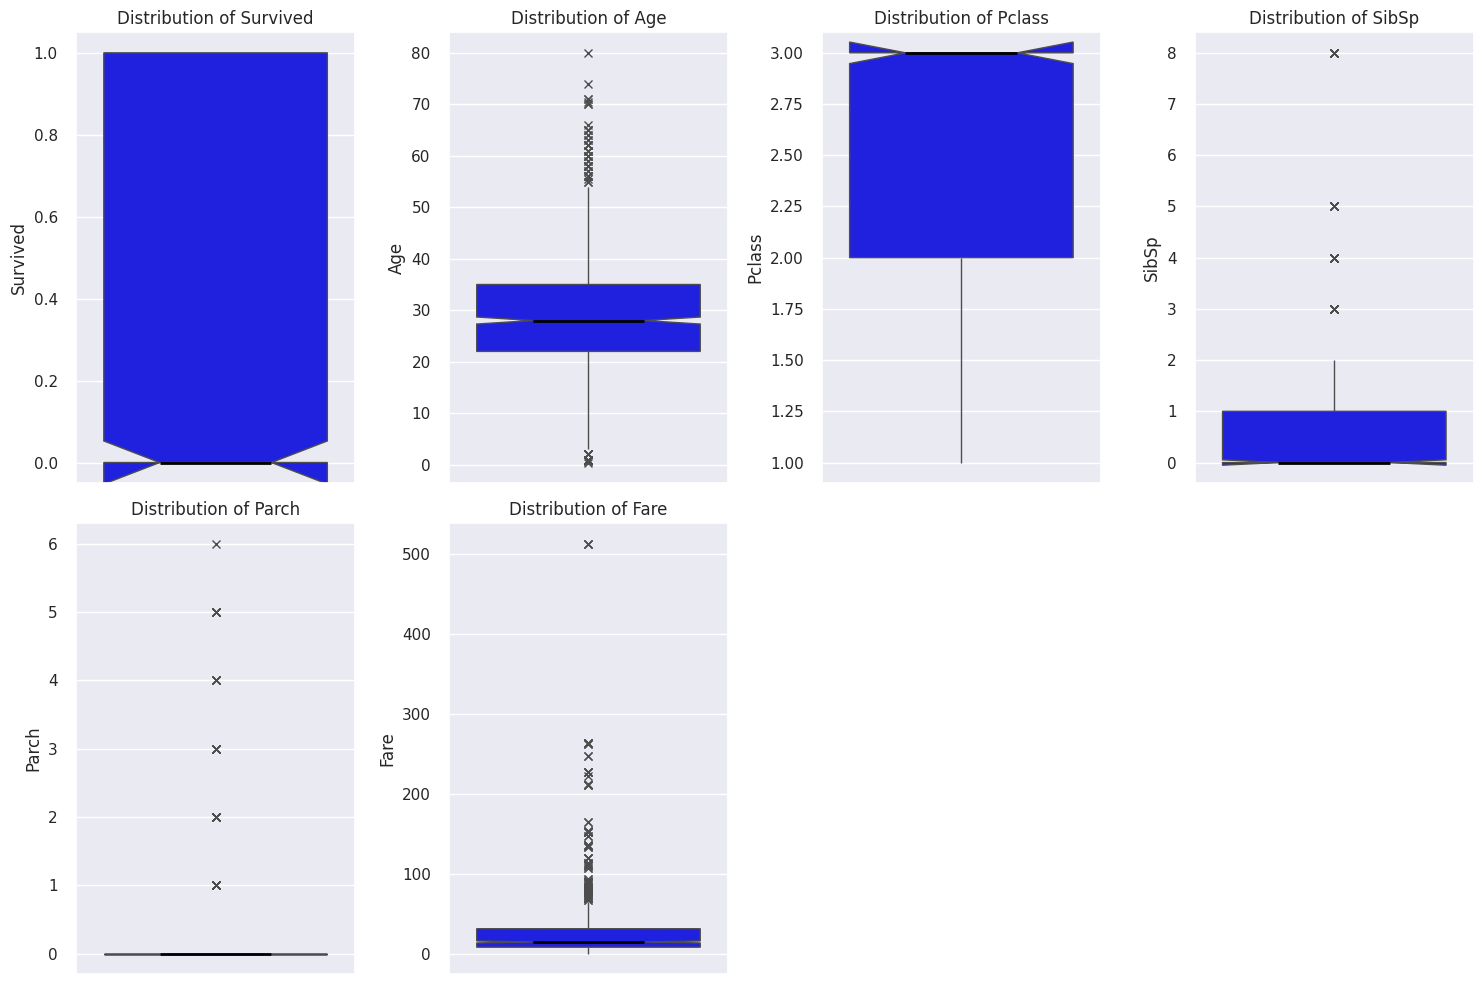

In [ ]:
# Boxplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
kolom = ('Survived','Age','Pclass','SibSp','Parch', 'Fare')
axes = axes.flatten()
for i, col in enumerate(kolom):
  sns.boxplot(df_train[col],color='blue',ax=axes[i],notch=True, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black", "linewidth": 2})
  axes[i].set_title(f'Distribution of {col}')

for j in range(len(kolom), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Handling Outlier

In [ ]:
def remove_outliers_iqr(data, variables, threshold=1.5):
    data_copy = data.copy()
    for variable in variables:
        q1 = data_copy[variable].quantile(0.25)
        q3 = data_copy[variable].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        data_copy = data_copy[(data_copy[variable] >= lower_bound) & (data_copy[variable] <= upper_bound)]
    return data_copy

variables_to_check = ['Survived','Age','Pclass','SibSp','Parch', 'Fare']
df_train_no = remove_outliers_iqr(df_train, variables_to_check)
df_train_no

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,B96 B98,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,B96 B98,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


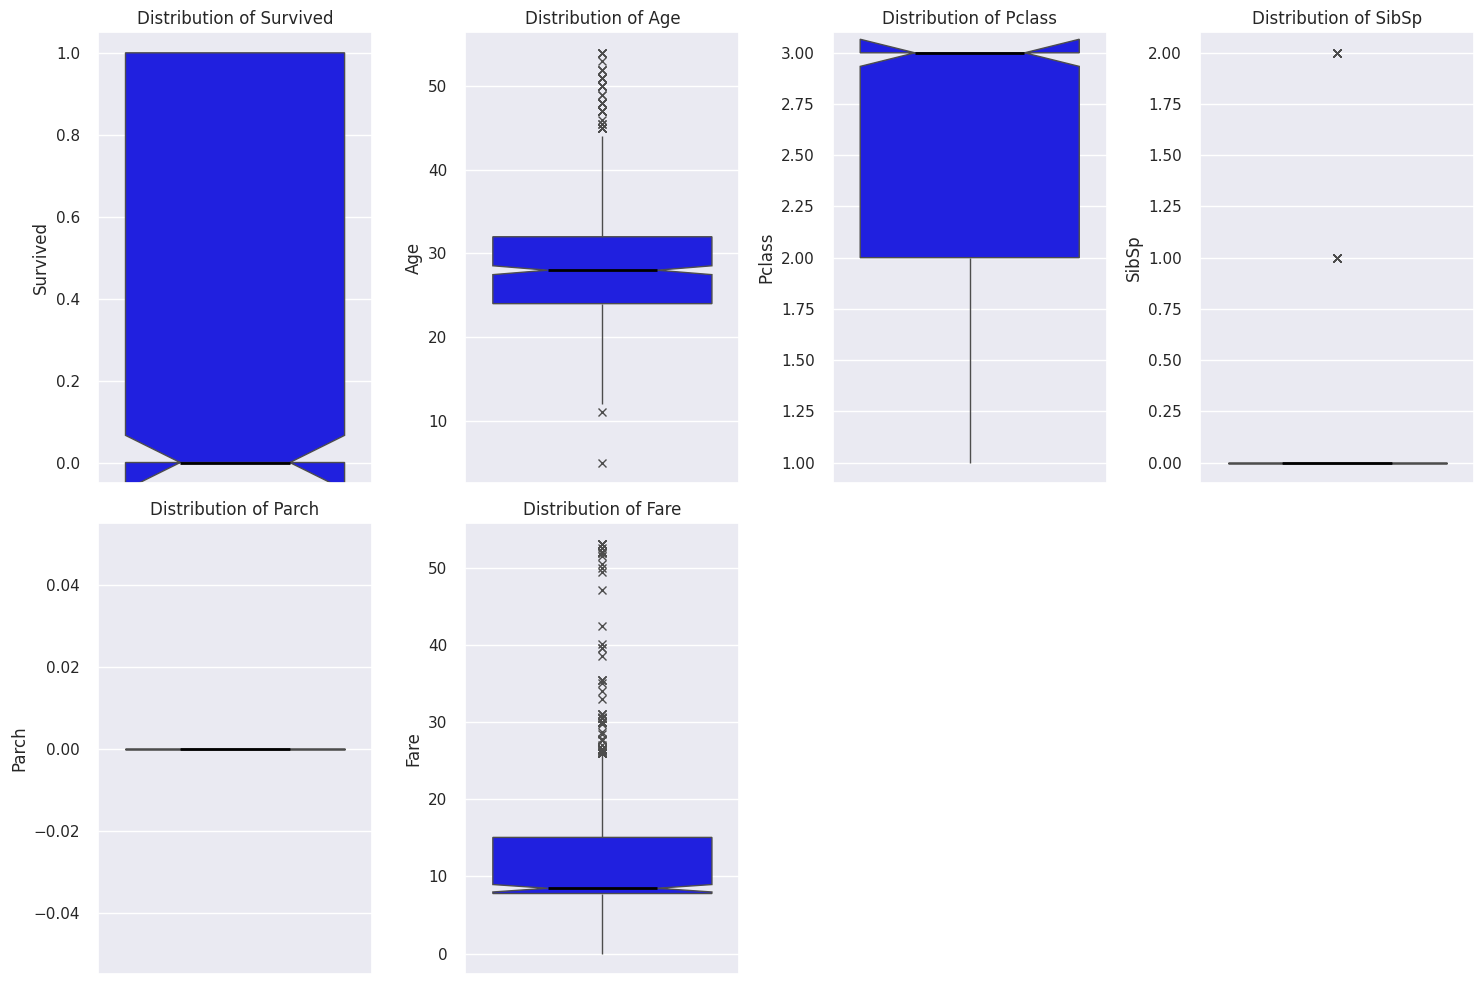

In [ ]:
# Boxplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
kolom = ('Survived','Age','Pclass','SibSp','Parch', 'Fare')
axes = axes.flatten()
for i, col in enumerate(kolom):
  sns.boxplot(df_train_no[col],color='blue',ax=axes[i],notch=True, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black", "linewidth": 2})
  axes[i].set_title(f'Distribution of {col}')

for j in range(len(kolom), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
statistika_deskriptif(df_train)

,Variabel,Mean,Median,Q1,Q3,Variance,SD,Range,Sum,Min,Max
0,PassengerId,446.000000,446.0000,223.5000,668.5,66156.666667,257.209383,890.0000,397386.0000,1.00,891.0000
1,Survived,0.383838,0.0000,0.0000,1.0,0.236506,0.486319,1.0000,342.0000,0.00,1.0000
2,Pclass,2.308642,3.0000,2.0000,3.0,0.698231,0.835602,2.0000,2057.0000,1.00,3.0000
3,Age,29.361582,28.0000,22.0000,35.0,169.322249,13.012388,79.5800,26161.1700,0.42,80.0000
4,SibSp,0.523008,0.0000,0.0000,1.0,1.214678,1.102124,8.0000,466.0000,0.00,8.0000
5,Parch,0.381594,0.0000,0.0000,0.0,0.648999,0.805605,6.0000,340.0000,0.00,6.0000
6,Fare,32.204208,14.4542,7.9104,31.0,2466.665312,49.665534,512.3292,28693.9493,0.00,512.3292


### Transformasi Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
akhir_train = df_train.copy()
survived_encoder = LabelEncoder()
pclass_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()
sibsp_encoder = LabelEncoder()
parch_encoder = LabelEncoder()
sex_encoder = LabelEncoder()

#akhir_train['Survived'] = survived_encoder.fit_transform(akhir_train['Survived'])
akhir_train['Pclass'] = pclass_encoder.fit_transform(akhir_train['Pclass'])
akhir_train['Embarked'] = embarked_encoder.fit_transform(akhir_train['Embarked'])
akhir_train['Sex'] = sex_encoder.fit_transform(akhir_train['Sex'])
akhir_train['SibSp'] = sibsp_encoder.fit_transform(akhir_train['SibSp'])
akhir_train['Parch'] = parch_encoder.fit_transform(akhir_train['Parch'])
#akhir_train = pd.get_dummies(df_train.copy(), columns=['tenure', 'country', 'products_number', 'gender', 'credit_card', 'active_member'], prefix=['tenure', 'country', 'products_number', 'gender', 'credit_card', 'active_member'])

### Reduksi Dimensi

<Axes: >

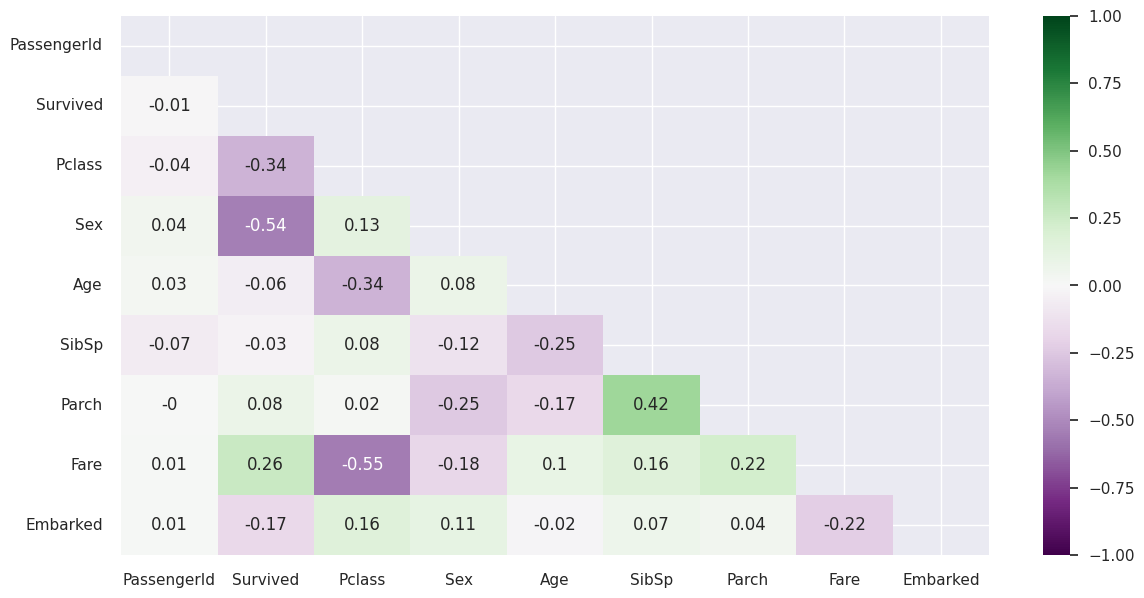

In [ ]:
import numpy as np

#untuk mengetahui korelasi linier antar variabel
mask = np.triu(np.ones_like(akhir_train.corr())) #agar yang muncul segitiga bawah

# annot = True untuk mencetak/ menampilkan nilai korelasi di dalam kotak
sns.set(rc={'figure.figsize':(14,7)})
sns.heatmap(akhir_train.corr(method='pearson').round(2), annot=True, cmap='PRGn', mask=mask, vmin=-1, vmax=1)

In [ ]:
drop_column = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
train = akhir_train.drop(columns= drop_column)
train

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,2,1,22.0,0,7.2500,2
1,1,0,0,38.0,0,71.2833,0
2,1,2,0,26.0,0,7.9250,2
3,1,0,0,35.0,0,53.1000,2
4,0,2,1,35.0,0,8.0500,2
...,...,...,...,...,...,...,...
886,0,1,1,27.0,0,13.0000,2
887,1,0,0,19.0,0,30.0000,2
888,0,2,0,28.0,2,23.4500,2
889,1,0,1,26.0,0,30.0000,0


## **Model**

### PyCaret

In [ ]:
pip install pycaret

In [ ]:
# Classification Functional API Example

# init setup
from pycaret.classification import *
s = setup(train, target = 'Survived', session_id = 123)

# model training and selection
best = compare_models()

# evaluate trained model
evaluate_model(best)

# predict on hold-out/test set
pred_holdout = predict_model(best)

# predict on new data
final_data = train.copy().drop('Survived', axis = 1)
predictions = predict_model(best, data = final_data)

# save model
save_model(best, 'best_pipeline')

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 7)"
4,Transformed data shape,"(891, 7)"
5,Transformed train set shape,"(623, 7)"
6,Transformed test set shape,"(268, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8201,0.8448,0.6986,0.8073,0.7461,0.6087,0.6147,0.2140
ada,Ada Boost Classifier,0.8072,0.8370,0.7283,0.7633,0.7418,0.5888,0.5924,0.1630
lightgbm,Light Gradient Boosting Machine,0.8008,0.8344,0.7025,0.7619,0.7284,0.5719,0.5753,0.3420
lr,Logistic Regression,0.7976,0.8523,0.7197,0.7470,0.7295,0.5685,0.5722,0.0430
rf,Random Forest Classifier,0.7961,0.8388,0.7022,0.7538,0.7236,0.5627,0.5664,0.2440
ridge,Ridge Classifier,0.7928,0.0000,0.6946,0.7481,0.7182,0.5551,0.5579,0.0270
lda,Linear Discriminant Analysis,0.7928,0.8512,0.6946,0.7481,0.7182,0.5551,0.5579,0.0280
xgboost,Extreme Gradient Boosting,0.7913,0.8364,0.6944,0.7439,0.7162,0.5519,0.5543,0.0670
qda,Quadratic Discriminant Analysis,0.7832,0.8459,0.6779,0.7403,0.7041,0.5342,0.5387,0.0290
nb,Naive Bayes,0.7815,0.8253,0.7241,0.7178,0.7174,0.5400,0.5435,0.0260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8172,0.8358,0.6505,0.8375,0.7322,0.5967,0.6077


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pclass', 'Sex', 'Age', 'Parch',
                                              'Fare', 'Embarked'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  TransformerWrap...
                                             criterion='friedman_ms

In [ ]:
pip install lightgbm

### Light Gradient Boosting Machine

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Data Preparation
X = train.drop(columns=['Survived'])
y = train['Survived']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# LightGBM Model
lgbm_model = LGBMClassifier()
lgbm_model.fit(x_train, y_train)

# Predictions
y_pred = lgbm_model.predict(x_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display Evaluation Results
print(f'Akurasi: {accuracy:.2f}')
print('Laporan Klasifikasi:\n', classification_rep)

[LightGBM] [Info] Number of positive: 244, number of negative: 379
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 183
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.391653 -> initscore=-0.440368
[LightGBM] [Info] Start training from score -0.440368
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


### Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

X = train.drop(columns=['Survived'])
y = train['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

gbc_model = GradientBoostingClassifier()
gbc_model.fit(x_train, y_train)

y_pred = gbc_model.predict(x_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f'Akurasi: {accuracy:.2f}')
print('Laporan Klasifikasi:\n', classification_rep)

Akurasi: 0.84
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       162
           1       0.82      0.75      0.79       106

    accuracy                           0.84       268
   macro avg       0.84      0.82      0.83       268
weighted avg       0.84      0.84      0.84       268



### Extreme Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Data Preparation
X = train.drop(columns=['Survived'])
y = train['Survived']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Predictions
y_pred = xgb_model.predict(x_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display Evaluation Results
print(f'Akurasi: {accuracy:.2f}')
print('Laporan Klasifikasi:\n', classification_rep)


Akurasi: 0.81
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       167
           1       0.75      0.72      0.74       101

    accuracy                           0.81       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.81      0.81       268



### Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Data Preparation
X = train.drop(columns=['Survived'])
y = train['Survived']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Logistic Regression Model
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)

# Predictions
y_pred = logreg_model.predict(x_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display Evaluation Results
print(f'Akurasi: {accuracy:.2f}')
print('Laporan Klasifikasi:\n', classification_rep)

Akurasi: 0.78
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       156
           1       0.76      0.71      0.73       112

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.78      0.78      0.78       268



### Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Data Preparation
X = train.drop(columns=['Survived'])
y = train['Survived']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

# Predictions
y_pred = rf_model.predict(x_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display Evaluation Results
print(f'Akurasi: {accuracy:.2f}')
print('Laporan Klasifikasi:\n', classification_rep)


Akurasi: 0.82
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       166
           1       0.78      0.73      0.75       102

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



# ***Data test.csv***

## **Import Data Test**

In [ ]:
df_test = pd.read_csv('test.csv')
id = df_test['PassengerId']
#df_test.drop('customer_id', axis=1, inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## **Pengecekan Data**

### Cek Tipe Data

In [ ]:
df_test_dtypes = pd.DataFrame({'Columns':df_test.columns})

lst_nilai = []
for i in df_test_dtypes['Columns']:
  lst_nilai.append(df_test[[i]].sample(1).values[[0]])

df_test_dtypes['Value'] = lst_nilai
df_test_dtypes['Data Types'] = df_test.dtypes.values

df_test_dtypes = df_test_dtypes.reset_index().drop(columns = ['index'])
df_test_dtypes

,Columns,Value,Data Types
0,PassengerId,[[1149]],int64
1,Pclass,[[1]],int64
2,Name,"[[Wells, Mrs. Arthur Henry (Addie"" Dart Trevas...",object
3,Sex,[[female]],object
4,Age,[[nan]],float64
5,SibSp,[[1]],int64
6,Parch,[[0]],int64
7,Ticket,[[113503]],object
8,Fare,[[6.4375]],float64
9,Cabin,[[nan]],object


In [ ]:
#Pembuktian jumlah sampel dari data yang telah diimpor
df_test.shape

(418, 11)

In [ ]:
print(df_test['Sex'].unique())
print(df_test['Embarked'].unique())
print(df_test['Cabin'].unique())
print(df_test['Ticket'].unique())

['male' 'female']
['Q' 'S' 'C']
[nan 'B45' 'E31' 'B57 B59 B63 B66' 'B36' 'A21' 'C78' 'D34' 'D19' 'A9'
 'D15' 'C31' 'C23 C25 C27' 'F G63' 'B61' 'C53' 'D43' 'C130' 'C132' 'C101'
 'C55 C57' 'B71' 'C46' 'C116' 'F' 'A29' 'G6' 'C6' 'C28' 'C51' 'E46' 'C54'
 'C97' 'D22' 'B10' 'F4' 'E45' 'E52' 'D30' 'B58 B60' 'E34' 'C62 C64' 'A11'
 'B11' 'C80' 'F33' 'C85' 'D37' 'C86' 'D21' 'C89' 'F E46' 'A34' 'D' 'B26'
 'C22 C26' 'B69' 'C32' 'B78' 'F E57' 'F2' 'A18' 'C106' 'B51 B53 B55'
 'D10 D12' 'E60' 'E50' 'E39 E41' 'B52 B54 B56' 'C39' 'B24' 'D28' 'B41'
 'C7' 'D40' 'D38' 'C105']
['330911' '363272' '240276' '315154' '3101298' '7538' '330972' '248738'
 '2657' 'A/4 48871' '349220' '694' '21228' '24065' 'W.E.P. 5734'
 'SC/PARIS 2167' '233734' '2692' 'STON/O2. 3101270' '2696' 'PC 17603'
 'C 17368' 'PC 17598' 'PC 17597' 'PC 17608' 'A/5. 3337' '113509' '2698'
 '113054' '2662' 'SC/AH 3085' 'C.A. 31029' 'C.A. 2315' 'W./C. 6607'
 '13236' '2682' '342712' '315087' '345768' '1601' '349256' '113778'
 'SOTON/O.Q. 3101263' 

### Analisis Deskriptif

In [ ]:
statistika_deskriptif(df_test)

,Variabel,Mean,Median,Q1,Q3,Variance,SD,Range,Sum,Min,Max
0,PassengerId,1100.500000,1100.5,996.25,1204.75,14560.250000,120.665861,417.0000,460009.0000,892.00,1309.0000
1,Pclass,2.265550,3.0,1.00,3.00,0.706995,0.840830,2.0000,947.0000,1.00,3.0000
2,Age,30.272590,NaN,NaN,NaN,200.500952,14.159836,75.8300,10050.5000,0.17,76.0000
3,SibSp,0.447368,0.0,0.00,1.00,0.802254,0.895686,8.0000,187.0000,0.00,8.0000
4,Parch,0.392344,0.0,0.00,0.00,0.960898,0.980254,9.0000,164.0000,0.00,9.0000
5,Fare,35.627188,NaN,NaN,NaN,3118.161494,55.840500,512.3292,14856.5376,0.00,512.3292


## **Prepocessing Data**

### Cek Missing Values

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
lst_missval = []

for i in df_test.isnull().sum():
  lst_missval.append((i / len(df_test) * 100))

df_test_missval = pd.DataFrame({'Column Name':df_test.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df_test.dtypes})

df_test_missval = df_test_missval.sort_values(by='Missing Value Percentage (%)',
                       ascending = False).reset_index().drop(columns = 'index')

df_test_missval

,Column Name,Missing Value Percentage (%),Data Types
0,Cabin,78.23,object
1,Age,20.57,float64
2,Fare,0.24,float64
3,PassengerId,0.00,int64
4,Pclass,0.00,int64
5,Name,0.00,object
6,Sex,0.00,object
7,SibSp,0.00,int64
8,Parch,0.00,int64
9,Ticket,0.00,object


In [ ]:
# Pengecekan nilai 0
nilai_nol = (df_test == 0).any().any()

if nilai_nol:
    print("Ada nilai 0 dalam DataFrame.")
else:
    print("Tidak ada nilai 0 dalam DataFrame.")

# Pengecekan nilai 0 per kolom
nilai_nol_per_kolom = (df_test == 0).any(axis=0)

if nilai_nol_per_kolom.any():
    print("Ada nilai 0 dalam satu atau lebih kolom.")
    kolom_dengan_nol = nilai_nol_per_kolom.index[nilai_nol_per_kolom].tolist()
    print("Kolom dengan nilai 0:", kolom_dengan_nol)
else:
    print("Tidak ada nilai 0 dalam semua kolom.")

Ada nilai 0 dalam DataFrame.
Ada nilai 0 dalam satu atau lebih kolom.
Kolom dengan nilai 0: ['SibSp', 'Parch', 'Fare']


### Handling Missing Values

In [ ]:
median_age = np.median(df_test['Age'].dropna())
median_fare = np.median(df_test['Fare'].dropna())
mode_cabin = df_test['Cabin'].mode()[0]

In [ ]:
df_test['Age'].fillna(median_age, inplace=True)
df_test['Cabin'].fillna(mode_cabin, inplace=True)
df_test['Fare'].fillna(median_fare, inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,B57 B59 B63 B66,S


### Cek Outlier

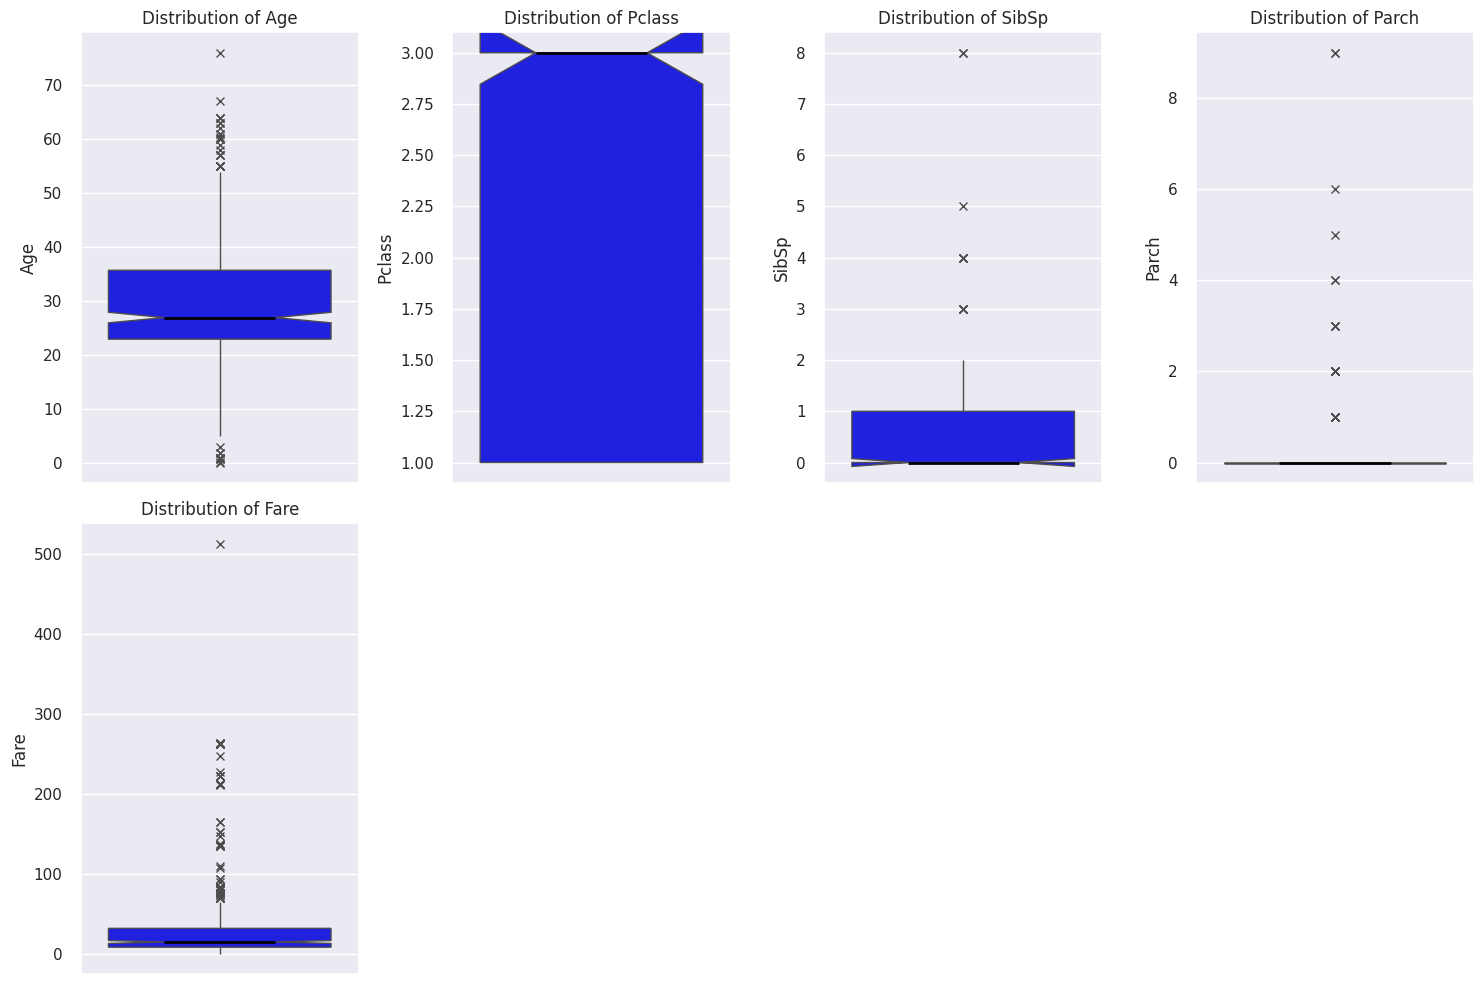

In [ ]:
# Boxplot
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 10))
kolom = ('Age','Pclass','SibSp','Parch', 'Fare')
axes = axes.flatten()
for i, col in enumerate(kolom):
  sns.boxplot(df_test[col],color='blue',ax=axes[i],notch=True, showcaps=False,
    flierprops={"marker": "x"},
    medianprops={"color": "black", "linewidth": 2})
  axes[i].set_title(f'Distribution of {col}')

for j in range(len(kolom), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Transformasi Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
akhir_test = df_test.copy()
survived_encoder = LabelEncoder()
pclass_encoder = LabelEncoder()
embarked_encoder = LabelEncoder()
sibsp_encoder = LabelEncoder()
parch_encoder = LabelEncoder()
sex_encoder = LabelEncoder()

#akhir_test['Survived'] = survived_encoder.fit_transform(akhir_test['Survived'])
akhir_test['Pclass'] = pclass_encoder.fit_transform(akhir_test['Pclass'])
akhir_test['Embarked'] = embarked_encoder.fit_transform(akhir_test['Embarked'])
akhir_test['Sex'] = sex_encoder.fit_transform(akhir_test['Sex'])
#akhir_test['tenure'] = tenure_encoder.fit_transform(akhir_test['tenure'])
#akhir_test['products_number'] = products_encoder.fit_transform(akhir_test['products_number'])
#akhir_test = pd.get_dummies(df_train.copy(), columns=['tenure', 'country', 'products_number', 'gender', 'credit_card', 'active_member'], prefix=['tenure', 'country', 'products_number', 'gender', 'credit_card', 'active_member'])
drop_column = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp']
test = akhir_test.drop(columns= drop_column)
test

,Pclass,Sex,Age,Parch,Fare,Embarked
0,2,1,34.5,0,7.8292,1
1,2,0,47.0,0,7.0000,2
2,1,1,62.0,0,9.6875,1
3,2,1,27.0,0,8.6625,2
4,2,0,22.0,1,12.2875,2
...,...,...,...,...,...,...
413,2,1,27.0,0,8.0500,2
414,0,0,39.0,0,108.9000,0
415,2,1,38.5,0,7.2500,2
416,2,1,27.0,0,8.0500,2


In [ ]:
# Periksa nama fitur pada saat training
print("Nama Fitur pada saat Trainining", train.columns)

# Periksa nama fitur pada saat prediksi
print("Nama Fitur pada saat Prediksi:", test.columns)

Nama Fitur pada saat Trainining Index(['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked'], dtype='object')
Nama Fitur pada saat Prediksi: Index(['Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked'], dtype='object')


## **CSV untuk Submission Challenge**

In [ ]:
submission = pd.DataFrame()
submission['PassengerId'] = id
submission['Survived'] = gbc_model.predict(test)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
# Save the updated sample submission file to a new CSV file
updated_submission_path = "submission_2.csv"
submission.to_csv(updated_submission_path, index=False)